# 1 - Introduction

Name : Gilang Wiradhyaksa

Batch : SBY - 001

Data : [AI Fruit and Real Fruit](https://www.kaggle.com/datasets/osmankagankurnaz/dataset-of-ai-generated-fruits-and-real-fruits/data)

# 2 - Import Libraries

In [26]:
# Import libraries

import os
import glob
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from pathlib import Path

from jmd_imagescraper.core import *

import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [9]:
# Listing images of each category

ai_files = glob.glob('dataset/ai/*')
real_files = glob.glob('dataset/real/*')

ai_files.sort()
real_files.sort()

print('ai_files : ', ai_files)
print('real_files : ', real_files)

ai_files :  ['dataset/ai\\green-apple-ohs-1.jpg', 'dataset/ai\\green-apple-ohs-10.jpg', 'dataset/ai\\green-apple-ohs-11.jpg', 'dataset/ai\\green-apple-ohs-12.jpg', 'dataset/ai\\green-apple-ohs-13.jpg', 'dataset/ai\\green-apple-ohs-14.jpg', 'dataset/ai\\green-apple-ohs-15.jpg', 'dataset/ai\\green-apple-ohs-16.jpg', 'dataset/ai\\green-apple-ohs-17.jpg', 'dataset/ai\\green-apple-ohs-18.jpg', 'dataset/ai\\green-apple-ohs-19.jpg', 'dataset/ai\\green-apple-ohs-2.jpg', 'dataset/ai\\green-apple-ohs-20.jpg', 'dataset/ai\\green-apple-ohs-21.jpg', 'dataset/ai\\green-apple-ohs-22.jpg', 'dataset/ai\\green-apple-ohs-23.jpg', 'dataset/ai\\green-apple-ohs-24.jpg', 'dataset/ai\\green-apple-ohs-25.jpg', 'dataset/ai\\green-apple-ohs-3.jpg', 'dataset/ai\\green-apple-ohs-4.jpg', 'dataset/ai\\green-apple-ohs-5.jpg', 'dataset/ai\\green-apple-ohs-6.jpg', 'dataset/ai\\green-apple-ohs-7.jpg', 'dataset/ai\\green-apple-ohs-8.jpg', 'dataset/ai\\green-apple-ohs-9.jpg', 'dataset/ai\\green-apple-ss-1.jpg', 'dataset/a

In [8]:
# Another way to load image
# Directory
main_path = 'dataset'

ai_dir = os.path.join(main_path, 'ai')
real_dir = os.path.join(main_path, 'real')

ai_glob= glob.glob(ai_dir + '/*.jpg')
real_glob= glob.glob(real_dir + '/*.jpg')

ai_glob.sort()
real_glob.sort()

print('ai_glob : ', ai_glob)
print('real_glob : ', real_glob)

ai_glob :  ['dataset\\ai\\green-apple-ohs-1.jpg', 'dataset\\ai\\green-apple-ohs-10.jpg', 'dataset\\ai\\green-apple-ohs-11.jpg', 'dataset\\ai\\green-apple-ohs-12.jpg', 'dataset\\ai\\green-apple-ohs-13.jpg', 'dataset\\ai\\green-apple-ohs-14.jpg', 'dataset\\ai\\green-apple-ohs-15.jpg', 'dataset\\ai\\green-apple-ohs-16.jpg', 'dataset\\ai\\green-apple-ohs-17.jpg', 'dataset\\ai\\green-apple-ohs-18.jpg', 'dataset\\ai\\green-apple-ohs-19.jpg', 'dataset\\ai\\green-apple-ohs-2.jpg', 'dataset\\ai\\green-apple-ohs-20.jpg', 'dataset\\ai\\green-apple-ohs-21.jpg', 'dataset\\ai\\green-apple-ohs-22.jpg', 'dataset\\ai\\green-apple-ohs-23.jpg', 'dataset\\ai\\green-apple-ohs-24.jpg', 'dataset\\ai\\green-apple-ohs-25.jpg', 'dataset\\ai\\green-apple-ohs-3.jpg', 'dataset\\ai\\green-apple-ohs-4.jpg', 'dataset\\ai\\green-apple-ohs-5.jpg', 'dataset\\ai\\green-apple-ohs-6.jpg', 'dataset\\ai\\green-apple-ohs-7.jpg', 'dataset\\ai\\green-apple-ohs-8.jpg', 'dataset\\ai\\green-apple-ohs-9.jpg', 'dataset\\ai\\green-ap

# 4 - Exploratory Data Analysis

## 4.1 - Data Distribution

In [20]:
counts = [len(ai_files), len(real_files)]
labels = ['AI Generated Fruit', 'Real Fruit']

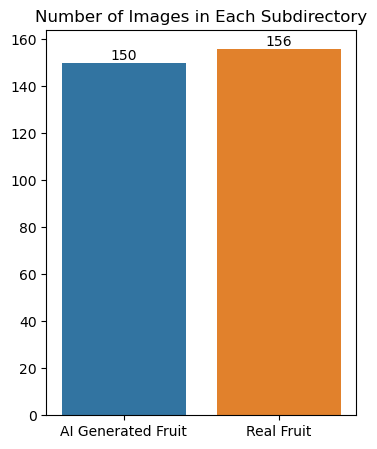

In [21]:
plt.subplots(figsize=(4, 5))
ax = sns.barplot(x=labels, y=counts, orient='v')
ax.bar_label(ax.containers[0])
ax.set(title='Number of Images in Each Subdirectory')
plt.show()

## 4.2 - Data Shape

In [24]:
random_index = np.random.randint(0, len(ai_files)-1)

img_ai_fruit = cv2.imread(ai_files[random_index])
img_real_fruit = cv2.imread(real_files[random_index])

print('Image in AI Generated Fruit shape:', img_ai_fruit.shape)
print('Image in Real Fruit shape:', img_real_fruit.shape)

Image in AI Generated Fruit shape: (2048, 2048, 3)
Image in Real Fruit shape: (2240, 3984, 3)


## 4.3 - Visualize Data

In [28]:
def random_sample(image_files, num_samples=5):
  random_files= random.sample(image_files, num_samples)
  return random_files

In [29]:
random_ai_fruit = random_sample(ai_files)
random_real_fruit = random_sample(real_files)

In [33]:
def visualize_img(random_data, labels=None):
  fig, axes= plt.subplots(1,5, figsize=(15,12))
  for i, image_path in enumerate(random_data):
    image = plt.imread(image_path)
    axes[i].imshow(image) # bisa tanpa cmap kalau bener2 RGB
    axes[i].set_title(f'{labels}, {image.shape}')
    axes[i].axis('off')
  plt.show()

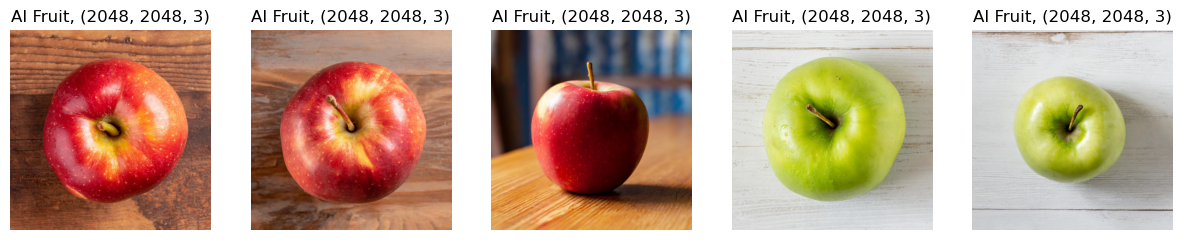

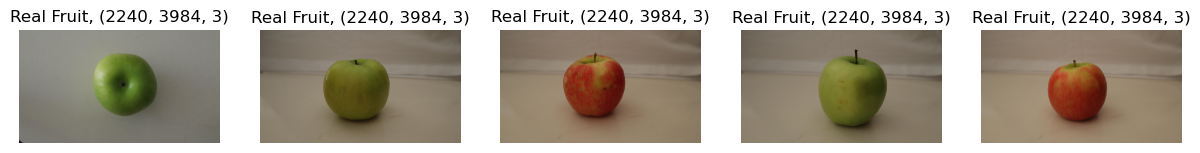

In [32]:
visualize_img(random_ai_fruit, "AI Fruit")
visualize_img(random_real_fruit, "Real Fruit")

## 4.4 - Mean Image Classes

In [34]:
def find_mean_img(image_filenames):
    # create an empty list to store the images
    images = []
    
    # loop over the image filenames
    for filename in image_filenames:
        # read the image and resize it to a fixed size
        img = cv2.imread(filename)
        img = cv2.resize(img, (128, 128))
        
        # convert the image to a numpy array and add it to the list
        img = np.array(img, dtype=np.float32)
        images.append(img)
    
    # calculate the mean of the images along the first axis (the image index)
    mean_image = np.mean(images, axis=0)
    
    # convert the mean image back to unsigned 8-bit integer format
    mean_image = np.array(mean_image, dtype=np.uint8)
    
    return mean_image

In [35]:
ai_mean = find_mean_img(ai_files)
real_mean = find_mean_img(real_files)

Text(0.5, 1.0, 'Real Fruit')

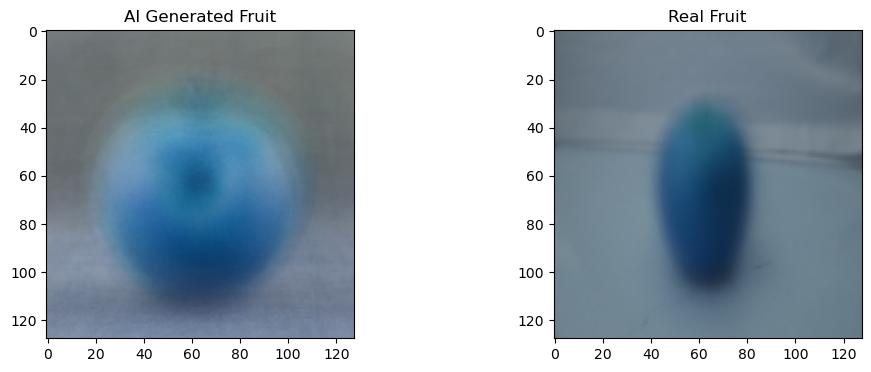

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(ai_mean)
ax[0].set_title("AI Generated Fruit")

ax[1].imshow(real_mean)
ax[1].set_title("Real Fruit")